# Problem 8.5

##### Initialisation

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.linalg as la
from IPython.display import Image

##### Schematic drwawig of the model <img src="fig8p5.jpg" style="width:600px">

Set the parameter values of the elements in the system:

In [34]:
m1 = 10.   # [kg]
m2 = 2.    # [kg]
k1 = 500.  # [N/m]
k2=300.    # [N/m]
k3 = 250.  # [N/m]
b = 15.    # [Ns/m]
Fi = 50.   # N

The equations of the system are given by the element equations:
$$
m_1 \frac{d v_1}{d t} = F_{m_1} \\
m_2 \frac{d v_2}{d t} = F_{m_2} \\
\frac{1}{k_1} \frac{d F_{k_1}}{d t} = 0 - v_1 \\
\frac{1}{k_2} \frac{d F_{k_2}}{d t} = v_1 - v_2 \\
\frac{1}{k_3} \frac{d F_{k_3}}{d t} = v_2 - 0 \\
$$
and the coupling equations:
$$
F_{m_2} = F_{k_2} - F_{k_3} \\
F_{m_1} = F_b + F_{k_1} - F_{k_2} + F_i \\
$$

Definition of the state vector:
$$
q = \left(
\begin{matrix}
v_1 \\ v_2 \\ F_1 \\ F_2 
\end{matrix}
\right)
$$

The matrisces are given by:
$$
\mathbb{A} = \left(
\begin{matrix}
-\frac{b}{m_1} & 0 & \frac{1}{m_1} \left(1 + \frac{k_2}{k_1}\right) & \frac{k_2}{m_1 k_3} \\
0 & 0 & -\frac{k_2}{m_2 k_1} & -\frac{1}{m_2} \left(1 + \frac{k_2}{k_3}\right)\\
-k_1 & 0 & 0 & 0 \\
0 & k_3 & 0 & 0 
\end{matrix}
\right),
\;
\mathbb{B} = \left(
\begin{matrix}
\frac{1}{m_1} \\ 0 \\ 0 \\ 0 
\end{matrix}
\right),
\;
\mathbb{C} = \left(
\begin{matrix}
0 & 0 & -\frac{1}{k_1} & 0 \\
0 & 0 & 0 & \frac{1}{k_3} 
\end{matrix}
\right),
\;
\mathbb{D} = \left(
\begin{matrix}
0 \\ 0
\end{matrix}
\right).
$$

### Create the State-Space Model in Python

First define the matrices and create the state-space model

In [38]:
aa = np.array([[-b/m1,0,1/m1*(1+k2/k1),k2/(m1*k3)],
[0,0,-k2/(m2*k1),-(1+k2/k3)/m2],
[-k1,0,0,0],
[0,k3,0,0]])
bb = np.array([[Fi/m1], [0.], [0.],[0.]])
cc = np.array([[0, 0, -1./k1, 0],[0.,0.,0.,1./k3]])
dd = np.array([[0.],[0.]])
sys5 = sig.StateSpace(aa, bb, cc, dd)
print(sys5)

StateSpaceContinuous(
array([[-1.5e+00,  0.0e+00,  1.6e-01,  1.2e-01],
       [ 0.0e+00,  0.0e+00, -3.0e-01, -1.1e+00],
       [-5.0e+02,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  2.5e+02,  0.0e+00,  0.0e+00]]),
array([[5.],
       [0.],
       [0.],
       [0.]]),
array([[ 0.   ,  0.   , -0.002,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.004]]),
array([[0.],
       [0.]]),
dt: None
)


Perform a simulation of a step-response.

In [17]:
t5 = np.linspace(0.,20.,400)
t5out, yout = sig.step(sys5, T=t5)

and display the results

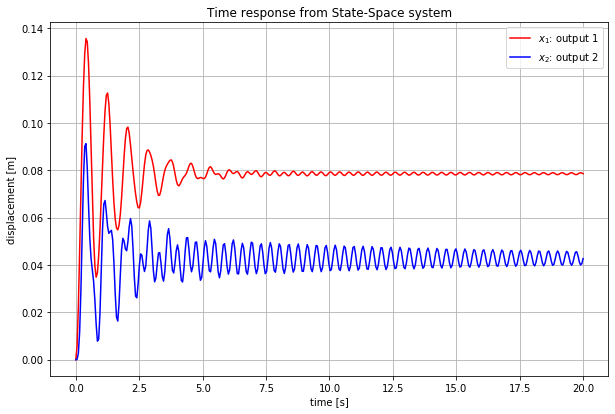

In [39]:
plt.figure(figsize=(10,6.5))
plt.plot(t5out,yout[:,0], 'r', label = r'$x_1$: output 1')
plt.plot(t5out,yout[:,1], 'b', label = r'$x_2$: output 2')
plt.xlabel('time [s]')
plt.ylabel('displacement [m]')
plt.legend()
plt.grid(True)
plt.title('Time response from State-Space system')
plt.show()

### Transfer function model

Derive the transfer function models from the state-space model.

In [24]:
sys5tf=sys5.to_tf()
print(sys5tf)

TransferFunctionContinuous(
array([[ 5.00000000e+00, -7.38964445e-13,  1.37500000e+03],
       [-5.11590770e-13, -1.13686838e-12,  7.50000000e+02]]),
array([1.000e+00, 1.500e+00, 3.550e+02, 4.125e+02, 1.750e+04]),
dt: None
)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


Select the two transfer functions

In [26]:
tf5a=sig.TransferFunction(sys5tf.num[0],sys5tf.den)
print('The first transferfunction is: ',tf5a)

The first transferfunction is:  TransferFunctionContinuous(
array([ 5.00000000e+00, -7.38964445e-13,  1.37500000e+03]),
array([1.000e+00, 1.500e+00, 3.550e+02, 4.125e+02, 1.750e+04]),
dt: None
)


In [27]:
tf5b=sig.TransferFunction(sys5tf.num[1],sys5tf.den)
print('The first transferfunction is: ',tf5b)

The first transferfunction is:  TransferFunctionContinuous(
array([-5.11590770e-13, -1.13686838e-12,  7.50000000e+02]),
array([1.000e+00, 1.500e+00, 3.550e+02, 4.125e+02, 1.750e+04]),
dt: None
)


Make a sumulation, now with no input, but two different initial conditions
- $v_1 = 1 $ looking at output $x_1$
- $v_2 = -1$ looking at output $x_2$

In [40]:
u5 = 2*np.ones_like(t5)
init1 = [1, 0, 0, 0]
init2 = [0, -1, 0, 0]
tout5a, y5a, x5a = sig.lsim(tf5a, u5, t5, X0=init1)
tout5b, y5b, x5b = sig.lsim(tf5b, u5, t5, X0=init2)

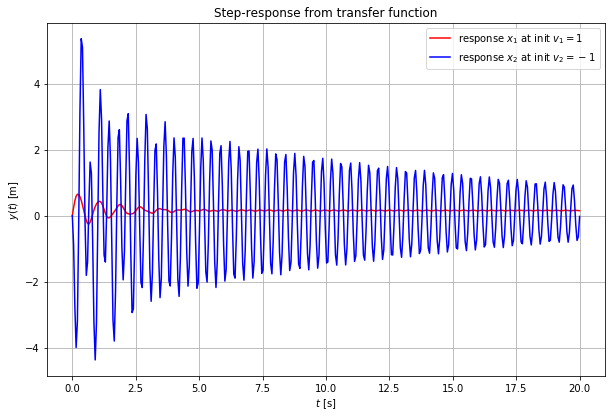

In [41]:
plt.figure(figsize=(10,6.5))
plt.plot(tout5, y5a, 'r', label=r'response $x_1$ at init $v_1 = 1$')
plt.plot(tout5, y5b, 'b', label=r'response $x_2$ at init $v_2 = -1$')
plt.xlabel (r'$t$ [s]')
plt.ylabel (r'$y(t)$ [m]')
plt.title('Step-response from transfer function')
plt.legend()
plt.grid(True)
plt.show()

# 